<a href="https://colab.research.google.com/github/fabiomattes2016/ASMDIR/blob/master/ASMDIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASMDIR - Sistema Automatizado para Diagnóstico Médico por Imagens Radiológicas**

***Importação das bibliotecas***

In [157]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import pandas.util.testing as tm
tf.__version__

'2.2.0-rc3'

***Carregamento da base de dados***

In [158]:
!rm -rf dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/dataset.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
image = tf.keras.preprocessing.image.load_img(r'/content/dataset/pneumonia/train/bacteriana/person12_bacteria_48.jpeg')

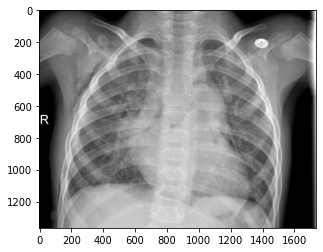

In [161]:
plt.imshow(image);

In [0]:
image = tf.keras.preprocessing.image.load_img(r'/content/dataset/pneumonia/train/normal/IM-0131-0001.jpeg')

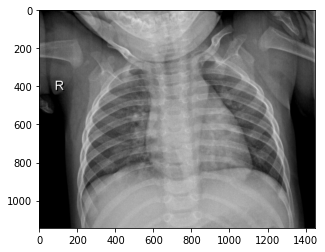

In [163]:
plt.imshow(image);

***Preparando o treinamento***

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [165]:
train_generator = train_datagen.flow_from_directory('/content/dataset/pneumonia/train',
                                                    target_size=(224,224),
                                                    batch_size=2,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 3000 images belonging to 3 classes.


In [166]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_train

1500

In [0]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [168]:
test_generator = test_datagen.flow_from_directory('/content/dataset/pneumonia/test',
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 300 images belonging to 3 classes.


In [169]:
step_size_test = test_generator.n // test_generator.batch_size
step_size_test

300

**Processos de Redes Neurais Convulocionais**

1.   Operador de convolução
2.   Pooling
3.   Flattening
4.   Rede Neural Artificial



***TransferLearning***
*   Arquitetura ResNet50



In [0]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

In [171]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
x = base_model.output

In [0]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation='softmax')(x)

In [0]:
model = tf.keras.Model(inputs=base_model.input, outputs=preds)

In [179]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [180]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_8
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [0]:
for layer in model.layers[:175]:
  layer.trainable = False

In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
history = model.fit_generator(generator=train_generator,
                              epochs=50,
                              steps_per_epoch=step_size_train,
                              validation_data=test_generator,
                              validation_steps=step_size_test)

Epoch 1/50
1500/1500 [==============================] - 81s 54ms/step - loss: 0.6704 - accuracy: 0.7257 - val_loss: 0.6909 - val_accuracy: 0.7800
Epoch 2/50
1500/1500 [==============================] - 80s 53ms/step - loss: 0.5178 - accuracy: 0.7913 - val_loss: 0.4985 - val_accuracy: 0.8167
Epoch 3/50
1500/1500 [==============================] - 78s 52ms/step - loss: 0.4745 - accuracy: 0.8113 - val_loss: 0.4406 - val_accuracy: 0.8633
Epoch 4/50
1500/1500 [==============================] - 78s 52ms/step - loss: 0.4391 - accuracy: 0.8187 - val_loss: 0.5074 - val_accuracy: 0.8133
Epoch 5/50
1500/1500 [==============================] - 78s 52ms/step - loss: 0.4291 - accuracy: 0.8303 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 6/50
1500/1500 [==============================] - 78s 52ms/step - loss: 0.4158 - accuracy: 0.8353 - val_loss: 0.4493 - val_accuracy: 0.8033
Epoch 7/50
1500/1500 [==============================] - 77s 52ms/step - loss: 0.3962 - accuracy: 0.8447 - val_loss: 0.4272 -

In [0]:
model.save_weights('weights.h5')
model.save('model.h5')

***Avaliação***

In [186]:
np.mean(history.history['val_accuracy'])

0.836933331489563

In [187]:
np.std(history.history['val_accuracy'])

0.032855511789022455

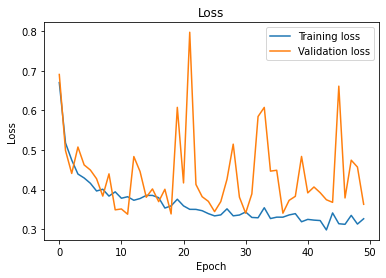

In [188]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

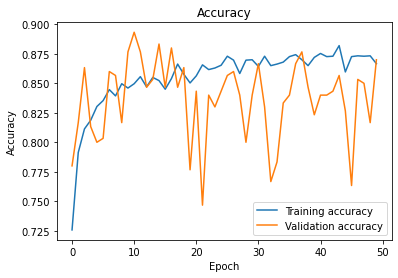

In [189]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

***Previsões***

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/content/model.h5')

In [191]:
filenames = test_generator.filenames
filenames

['bacteriana/person100_bacteria_475.jpeg',
 'bacteriana/person100_bacteria_477.jpeg',
 'bacteriana/person100_bacteria_478.jpeg',
 'bacteriana/person100_bacteria_479.jpeg',
 'bacteriana/person100_bacteria_480.jpeg',
 'bacteriana/person100_bacteria_481.jpeg',
 'bacteriana/person100_bacteria_482.jpeg',
 'bacteriana/person101_bacteria_483.jpeg',
 'bacteriana/person101_bacteria_484.jpeg',
 'bacteriana/person101_bacteria_485.jpeg',
 'bacteriana/person101_bacteria_486.jpeg',
 'bacteriana/person102_bacteria_487.jpeg',
 'bacteriana/person103_bacteria_488.jpeg',
 'bacteriana/person103_bacteria_489.jpeg',
 'bacteriana/person103_bacteria_490.jpeg',
 'bacteriana/person104_bacteria_491.jpeg',
 'bacteriana/person104_bacteria_492.jpeg',
 'bacteriana/person108_bacteria_504.jpeg',
 'bacteriana/person108_bacteria_506.jpeg',
 'bacteriana/person108_bacteria_507.jpeg',
 'bacteriana/person108_bacteria_511.jpeg',
 'bacteriana/person109_bacteria_512.jpeg',
 'bacteriana/person109_bacteria_513.jpeg',
 'bacterian

In [192]:
len(filenames)

300

In [193]:
predictions = model.predict_generator(test_generator, steps=len(filenames))

Instructions for updating:
Please use Model.predict, which supports generators.


In [194]:
predictions

array([[9.74623382e-01, 2.64319453e-07, 2.53763516e-02],
       [7.53589034e-01, 2.30777718e-04, 2.46180132e-01],
       [7.96947062e-01, 8.01491115e-05, 2.02972755e-01],
       [4.70178306e-01, 4.58340533e-03, 5.25238276e-01],
       [8.29765558e-01, 2.70449545e-05, 1.70207426e-01],
       [9.86493468e-01, 4.92718644e-10, 1.35064432e-02],
       [9.55857992e-01, 1.70383416e-07, 4.41419147e-02],
       [9.63000655e-01, 5.23493604e-08, 3.69993821e-02],
       [9.60249722e-01, 8.81065088e-09, 3.97502966e-02],
       [9.46297109e-01, 2.84706126e-03, 5.08557931e-02],
       [9.86325562e-01, 3.09556686e-11, 1.36745041e-02],
       [9.81972039e-01, 4.11018442e-10, 1.80280022e-02],
       [8.74884903e-01, 1.88568700e-03, 1.23229437e-01],
       [9.88182127e-01, 2.24320059e-11, 1.18178912e-02],
       [9.63761926e-01, 1.64621204e-04, 3.60734761e-02],
       [9.61322844e-01, 4.42150423e-07, 3.86766903e-02],
       [7.97736272e-02, 8.02422166e-01, 1.17804177e-01],
       [8.53183687e-01, 2.88080

In [195]:
len(predictions)

300

In [0]:
predictions2 = []
for i in range(len(predictions)):
  predictions2.append(np.argmax(predictions[i]))

In [197]:
predictions2

[0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,


In [198]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [199]:
test_generator.class_indices

{'bacteriana': 0, 'normal': 1, 'viral': 2}

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions2, test_generator.classes)

0.49333333333333335

In [201]:
cm = confusion_matrix(predictions2, test_generator.classes)
cm

array([[47, 13, 51],
       [52, 59,  7],
       [ 1, 28, 42]])

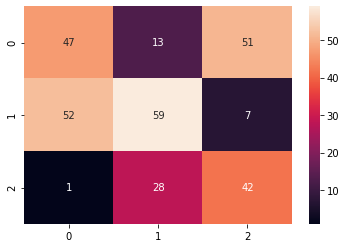

In [202]:
sns.heatmap(cm, annot=True);

***Testando Imagem***

In [0]:
amostra = '/content/covid-19-pneumonia-34.png'

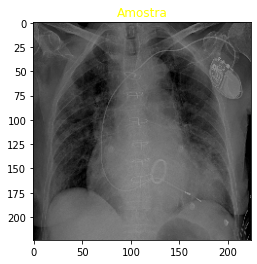

In [316]:
image = tf.keras.preprocessing.image.load_img(r''+amostra, target_size=(224,224))
plt.title('Amostra', color='yellow')
plt.imshow(image);

In [317]:
type(image)

PIL.Image.Image

In [318]:
image = tf.keras.preprocessing.image.img_to_array(image)
np.shape(image)

(224, 224, 3)

In [319]:
np.max(image), np.min(image)

(153.0, 0.0)

In [320]:
image = np.expand_dims(image, axis=0)
np.shape(image)

(1, 224, 224, 3)

In [0]:
image = tf.keras.applications.resnet50.preprocess_input(image)

In [322]:
np.max(image), np.min(image)

(49.060997, -123.68)

In [323]:
predictions = model.predict(image)
print(predictions)

[[2.827776e-01 4.507820e-04 7.167716e-01]]


In [324]:
predictions[0]

array([2.827776e-01, 4.507820e-04, 7.167716e-01], dtype=float32)

In [325]:
np.argmax(predictions[0])

2

In [326]:
list(train_generator.class_indices)

['bacteriana', 'normal', 'viral']

In [327]:
prediction = list(train_generator.class_indices)[np.argmax(predictions[0])]
prediction

'viral'

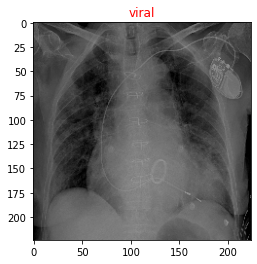

In [328]:
img = tf.keras.preprocessing.image.load_img(r''+amostra, target_size=(224,224))
plt.title(prediction, color='red')
plt.imshow(img);